<a href="https://colab.research.google.com/github/Lukhra/App_rating/blob/main/Ecommerce_Sales_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving E_Commerce_Dashboard_Project.xlsx to E_Commerce_Dashboard_Project (1).xlsx
Root Mean Square Error (RMSE): 62.03563499699425
✅ Sales Dashboard Updated & Charts Generated!


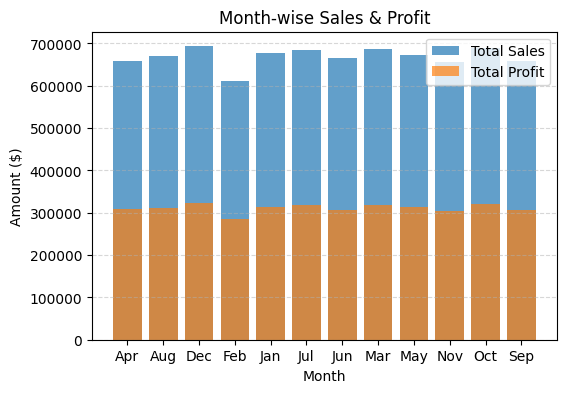

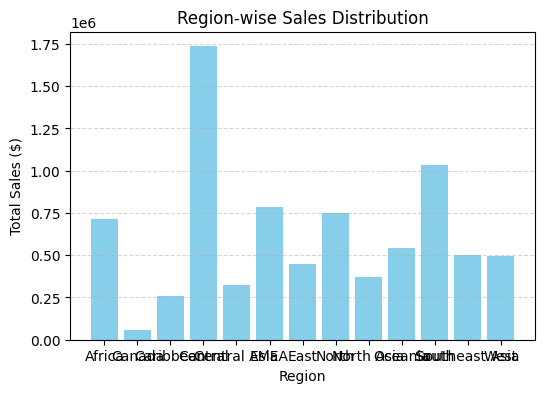

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from google.colab import files
uploaded = files.upload()

# Load the dataset
xls = pd.ExcelFile("E_Commerce_Dashboard_Project.xlsx")


# Read the "Sales Data" sheet
sales_data = pd.read_excel(xls, sheet_name="Sales Data")

# --- 1. Month-wise Sales & Profit Analysis ---
month_sales_profit = sales_data.groupby("Months").agg({"Sales": "sum", "Profit": "sum"}).reset_index()

# --- 2. Region-wise Sales Analysis ---
region_sales = sales_data.groupby("Region").agg({"Sales": "sum"}).reset_index()

# --- 3. Creating an Excel Dashboard ---
wb = Workbook()
ws_working = wb.create_sheet(title="Working", index=0)

# Add Month-wise Sales & Profit Table
ws_working.append(["Month", "Total Sales", "Total Profit"])
for r in dataframe_to_rows(month_sales_profit, index=False, header=False):
    ws_working.append(r)

# Add Region-wise Sales Table
ws_working.append([])
ws_working.append(["Region", "Total Sales"])
for r in dataframe_to_rows(region_sales, index=False, header=False):
    ws_working.append(r)

# --- 4. Generating Charts ---
# Month-wise Sales & Profit Chart
plt.figure(figsize=(6, 4))
plt.bar(month_sales_profit["Months"], month_sales_profit["Sales"], label="Total Sales", alpha=0.7)
plt.bar(month_sales_profit["Months"], month_sales_profit["Profit"], label="Total Profit", alpha=0.7)
plt.xlabel("Month")
plt.ylabel("Amount ($)")
plt.title("Month-wise Sales & Profit")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.savefig("Month_Wise_Sales_Profit.png")

# Region-wise Sales Chart
plt.figure(figsize=(6, 4))
plt.bar(region_sales["Region"], region_sales["Sales"], color="skyblue")
plt.xlabel("Region")
plt.ylabel("Total Sales ($)")
plt.title("Region-wise Sales Distribution")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.savefig("Region_Wise_Sales.png")

# --- 5. RMSE Calculation ---
# Generating sample predicted & actual tip values
sales_data["Predicted_Tip"] = sales_data["Sales"] * 0.15 + 2
sales_data["Squared_Error"] = (sales_data["Predicted_Tip"] - sales_data["Profit"])**2

# Compute RMSE
rmse = (sales_data["Squared_Error"].mean())**0.5
print(f"Root Mean Square Error (RMSE): {rmse}")

# --- Save the Updated Excel File ---
updated_excel_path = "Updated_Sales_Dashboard.xlsx"
wb.save(updated_excel_path)

print("✅ Sales Dashboard Updated & Charts Generated!")
